In [7]:
import numpy as np
import pandas as pd
from scipy import stats
import pickle

# Plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Filter warnings
# warnings.filterwarnings('ignore') #filter warnings
# Show plots inline
%matplotlib inline

ping_df = pd.read_csv('/content/dns_training_data.csv', delimiter='\t')
voice_df  = pd.read_csv('/content/voice_training_data.csv', delimiter='\t')
dns_df = pd.read_csv('/content/dns_training_data.csv', delimiter='\t')
telnet_df = pd.read_csv('/content/telnet_training_data.csv', delimiter='\t')
df = pd.concat([ping_df, voice_df, dns_df, telnet_df], ignore_index=True)




In [8]:
df.head

<bound method NDFrame.head of       Forward Packets  Forward Bytes  Delta Forward Packets  \
0                   0              0                      0   
1                   0              0                      0   
2                   6            410                      6   
3                   6            410                      6   
4                   9            616                      3   
...               ...            ...                    ...   
4621            18611        1635974                      0   
4622            18611        1635974                      0   
4623            18611        1635974                      0   
4624            18611        1635974                      0   
4625            18613        1636111                      2   

      Delta Forward Bytes  Forward Instantaneous Packets per Second  \
0                       0                                       0.0   
1                       0                                       0.0   


In [9]:
df.dropna(inplace=True)
df.drop('Forward Packets', axis=1, inplace=True)
df.drop('Forward Bytes', axis=1, inplace=True)
df.drop('Reverse Packets', axis=1, inplace=True)
df.drop('Reverse Bytes', axis=1, inplace=True)
df['Traffic Type'] = df['Traffic Type'].astype('category')

print ('Value counts:')
df['Traffic Type'].value_counts()

Value counts:


dns       2308
telnet    1181
voice     1137
Name: Traffic Type, dtype: int64

In [12]:
X = df.drop('Traffic Type',axis=1)
y = df['Traffic Type']

X_test, X_train, y_test, y_train = train_test_split(X,y,test_size=0.2, random_state=101)
X_test1,X_val,y_test1,y_val=train_test_split(X_test,y_test,test_size=0.5)

model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train,y_train)

idx = 727 #random number
single_x_test = [df.iloc[idx].drop('Traffic Type').tolist()]
single_y_test = df.iloc[idx]['Traffic Type']

single_prediction = model.predict(single_x_test)

print('For this sample, our model predicted %s and it was actually %s' % (single_prediction[0], single_y_test))

For this sample, our model predicted dns and it was actually dns


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [13]:
predictions = model.predict(X_test1)

resultsDF = pd.DataFrame({
        'true':y_test1,
        'predicted':predictions
    })
resultsDF.head()

print('Accuracy: %.2f%%' % (accuracy_score(predictions,y_test1)*100))

Accuracy: 99.95%


In [14]:
single_x_val = [df.iloc[idx].drop('Traffic Type').tolist()]
single_y_val = df.iloc[idx]['Traffic Type']

single_prediction = model.predict(single_x_val)
print('For this sample, our model predicted %s and it was actually %s' % (single_prediction[0], single_y_val))

predictions = model.predict(X_val)

resultsDF1 = pd.DataFrame({
        'true':y_val,
        'predicted':predictions
    })
resultsDF1.head()

print('Accuracy: %.2f%%' % (accuracy_score(predictions,y_val)*100))

For this sample, our model predicted dns and it was actually dns
Accuracy: 99.78%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Enter max value of K to consider: 901


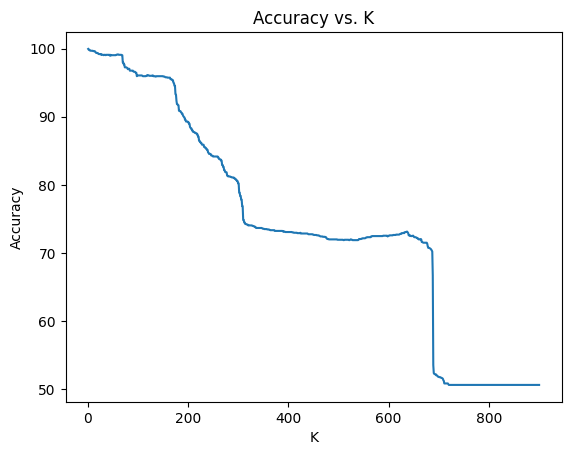

In [15]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

k = 0
max_k = int(input('Enter max value of K to consider: '))

accu = np.zeros(max_k)

for k in range(1, max_k):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test1)

    resultsDF = pd.DataFrame({
        'true': y_test1,
        'predicted': y_pred
    })
    resultsDF.head()

    accu[k] = accuracy_score(y_test1, y_pred) * 100

plt.plot(range(1, max_k), accu[1:])
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. K')
plt.show()
